In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
def importar():
    d1 = pd.read_csv("./Dados/Plant_1_Generation_Data.csv")
    d2 = pd.read_csv("./Dados/Plant_1_Weather_Sensor_Data.csv")
    return  d1,d2

In [121]:
df1, df2 = importar()

In [122]:
df1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [123]:
df2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


O dataset apresentar inversores, cada inversor tem um código chamado de source_key. Ele vai transformar a energia Dc em Ac. 
1. Podemos identificar bons e maus inversores?
2. Podemos prever a geração de energia para os próximos dias?

# Exploração dos dados

### Entendendo os dados

In [124]:
df1.duplicated().sum()

0

In [126]:
df2.duplicated().sum()

0

In [125]:
df1.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [66]:
df2.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [127]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
PLANT_ID,68778.0,4.135001e+06,0.000000,4135001.0,4.135001e+06,4.135001e+06,4.135001e+06,4135001.000
DC_POWER,68778.0,3.147426e+03,4036.457169,0.0,0.000000e+00,4.290000e+02,6.366964e+03,14471.125
AC_POWER,68778.0,3.078028e+02,394.396439,0.0,0.000000e+00,4.149375e+01,6.236187e+02,1410.950
DAILY_YIELD,68778.0,3.295969e+03,3145.178309,0.0,0.000000e+00,2.658714e+03,6.274000e+03,9163.000
TOTAL_YIELD,68778.0,6.978712e+06,416271.982856,6183645.0,6.512003e+06,7.146685e+06,7.268706e+06,7846821.000


In [128]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
PLANT_ID,3182.0,4.135001e+06,0.000000,4.135001e+06,4.135001e+06,4.135001e+06,4.135001e+06,4.135001e+06
AMBIENT_TEMPERATURE,3182.0,2.553161e+01,3.354856,2.039850e+01,2.270518e+01,2.461381e+01,2.792053e+01,3.525249e+01
MODULE_TEMPERATURE,3182.0,3.109102e+01,12.261222,1.814042e+01,2.109055e+01,2.461806e+01,4.130784e+01,6.554571e+01
IRRADIATION,3182.0,2.283128e-01,0.300836,0.000000e+00,0.000000e+00,2.465348e-02,4.495884e-01,1.221652e+00


In [47]:
df1['PLANT_ID'].unique()

array([4135001], dtype=int64)

In [49]:
df2['PLANT_ID'].unique()

array([4135001], dtype=int64)

In [52]:
# Total de transformadores nos dados 1
df1['SOURCE_KEY'].nunique()

22

In [53]:
# Para o DF2, o source_key representa a identificação do Painel da planta e cada planta só tem uma.
# Podemos então remover os dados de plant_id, Source_key do df2
# Para o DF1 o plant_id da para remover
df2['SOURCE_KEY'].unique()

array(['HmiyD2TTLFNqkNe'], dtype=object)

In [41]:
# Analisando os dados de tempo, podemos decompor os date_time

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


### Tratamento dos dados

In [168]:
def tratamento(dataset, remover):
    dados = dataset.copy()
    dados = dados.drop(columns=remover)
    return dados

a1 = tratamento(df1,['PLANT_ID'])
a2 = tratamento(df2,['PLANT_ID','SOURCE_KEY'])

In [165]:
def decompor_tempo(dataset):
    dados = dataset.copy()
    dados['DATE_TIME'] = pd.to_datetime(dados['DATE_TIME'],dayfirst=True)
    dados['hora'] = dados['DATE_TIME'].dt.strftime("%H:%M")
    return dados


In [169]:
a1 = decompor_tempo(a1)
a1.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,hora
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,00:00
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,00:00
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,00:00
3,2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,00:00
4,2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,00:00


In [171]:
a2 = decompor_tempo(a2)
a2.head()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,hora
0,2020-05-15 00:00:00,25.184316,22.857507,0.0,00:00
1,2020-05-15 00:15:00,25.084589,22.761668,0.0,00:15
2,2020-05-15 00:30:00,24.935753,22.592306,0.0,00:30
3,2020-05-15 00:45:00,24.846130,22.360852,0.0,00:45
4,2020-05-15 01:00:00,24.621525,22.165423,0.0,01:00


### Visualização Gráfica

In [107]:
sns.set(style='ticks')


<Axes: xlabel='hora', ylabel='value'>

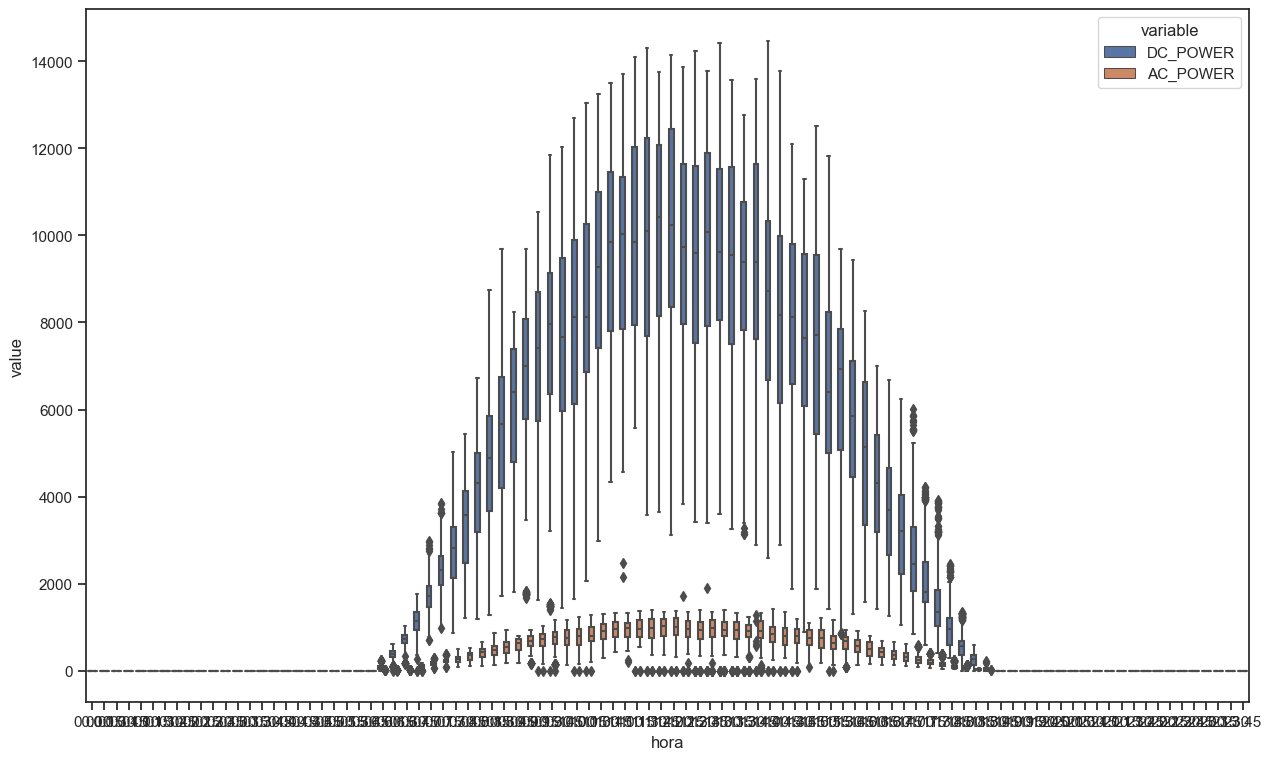

In [180]:
c1 = a1[['DC_POWER','AC_POWER','hora']].melt(id_vars='hora')
plt.figure(figsize=(15,9))
sns.boxplot(data=c1, x='hora',y='value',hue='variable')

In [ ]:
a1.groupby(['hora','SOURCE_KEY'], as_index=False)[['AC_POWER','DC_POWER']].std().drop(columns=['SOURCE_KEY'])

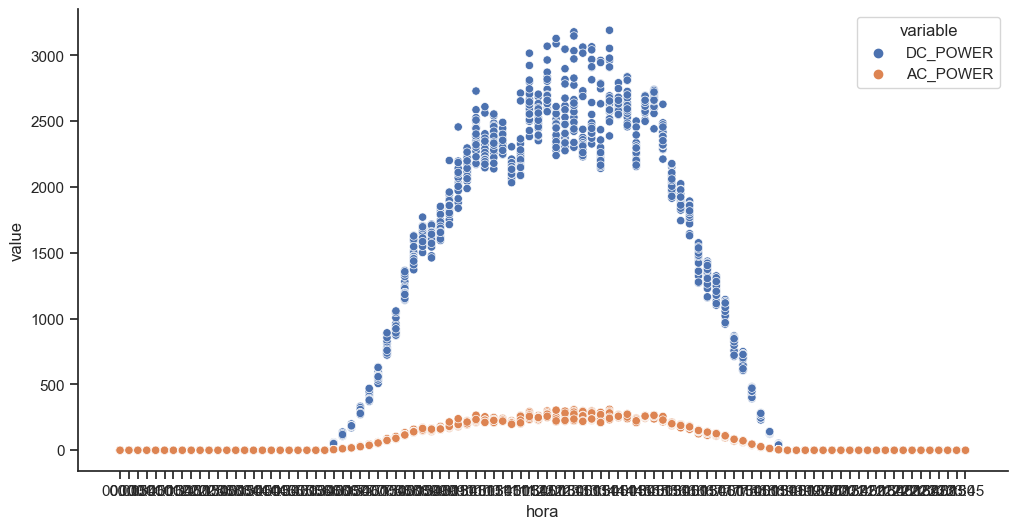

In [113]:

c1 = a1.groupby(['hora','SOURCE_KEY'], as_index=False)[['AC_POWER','DC_POWER']].std().drop(columns=['SOURCE_KEY'])
c1 = c1.melt(id_vars=['hora'], value_vars = ['DC_POWER','AC_POWER'])
plt.figure(figsize=(12,6))
sns.scatterplot(data=c1, x='hora',y='value',hue='variable')
sns.despine()

In [172]:
a1

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,hora
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,00:00
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,00:00
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,00:00
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,00:00
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,00:00
...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,23:45
68774,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,23:45
68775,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,23:45
68776,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,23:45


<Axes: xlabel='hora', ylabel='DC_POWER'>

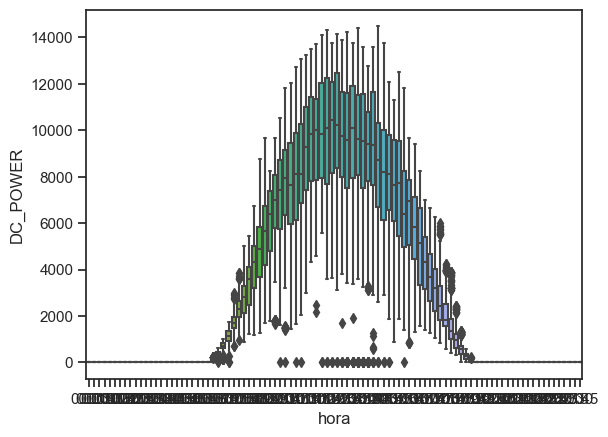

In [173]:
sns.boxplot(data=a1, x='hora',y='DC_POWER')

In [117]:
def importar():
    dados = pd.read_csv("./Dados/spg.csv")
    return dados

In [118]:
importar()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,...,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,...,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060
